In [28]:
#import the necessary headerfiles or import the dependencies is known as headerfiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #it is useful for the data visualization
from sklearn.model_selection import train_test_split
#The important that import random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score#it is useful to find how well our model is performing

In [2]:
#Data collection 
#loading the data set to a  pandas data frame
wine_dataset=pd.read_csv("C:\\Users\\kotha\\OneDrive\\Desktop\\winequality-red.csv")

In [3]:
#now checking the rows and columns in the data set
wine_dataset.shape

(1599, 12)

In [4]:
#Now lets check the sample of the dataset to see what are the different feauters are there in data frame
#First five rows of the data set
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Now last 5 rows are
wine_dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
#using this data we should predict the quality of the wine

In [7]:
#The main part in the machine learning projects is to check wether there is any missing vakues in the dataset
#If there is missing values then the output errors will be occured
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#we not have the msiing values in the dataset if it is there means we need to fill the values or we need to drop that rows or need to find the mean and fill the missing values

In [50]:
#Data analysis and visualization
#lets get some statistical measures of the dataset
wine_dataset.describe() #we will get mean standard deviationa and percentage of the dataset
#These values are very helpful to see what are the range of the values in each column

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


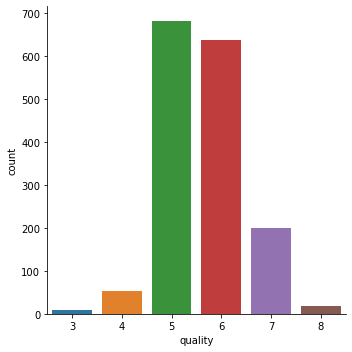

In [51]:
#Number of values for each quality for this we will use seaborn function
sns.catplot(x='quality',data=wine_dataset,kind='count')
#These are the different quality values

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

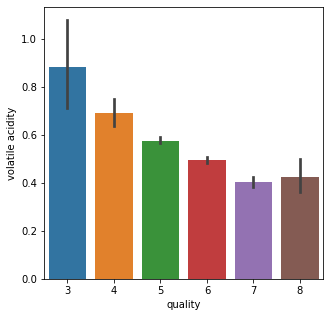

In [30]:
#Now we can compare the volatile acidity and the quality columns
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

In [16]:
#if volatile acidity is high then the quality is low
#Volatile acidity is around 5 
#These see that volatilke quality and quality will is inversly propotional

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

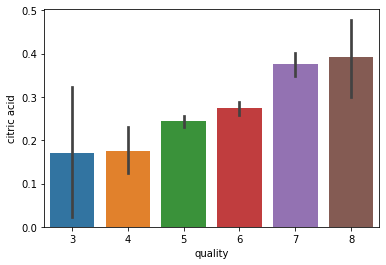

In [18]:
#citric acid vs quality
sns.barplot(x='quality',y='citric acid',data=wine_dataset)
#if the citric acid content is more then we are getting the high quality of the wine if it is low then the quality is not high

In [19]:
#this is the advantages of the data analysis part it helps us to understand the which columns are more related to our label
#The volatile is inversly propotional and citric acid is directly propotional

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

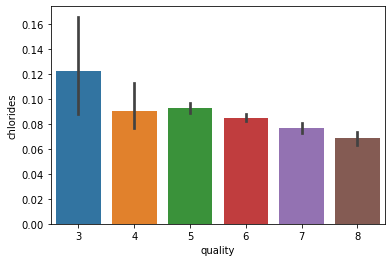

In [20]:
#chlorides vs quality
sns.barplot(x='quality',y='chlorides',data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

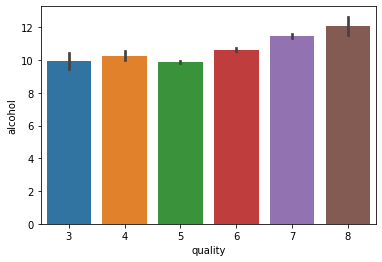

In [21]:
#quality vs alcohol
sns.barplot(x='quality',y='alcohol',data=wine_dataset)
#directly propotional

In [23]:
#Now we will find the correlation between all the columns and the quality columns
#There are to types of correlation positive and negative
correlation=wine_dataset.corr()

<AxesSubplot:>

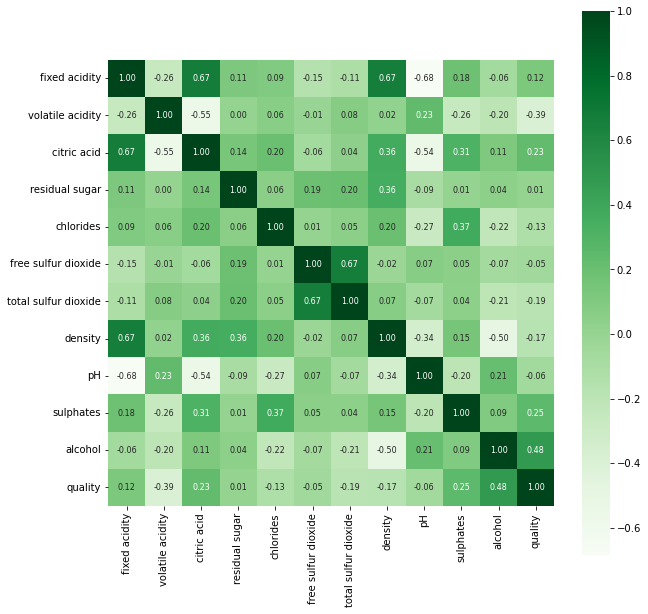

In [29]:
#constructing a heat map to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Greens')

In [31]:
#Annotations are nothing but headings 
#Data preprocessing 
#we  need to seperate all data and quality column
#because we are checking the quality column

In [32]:
#seperate data and label
X=wine_dataset.drop('quality',axis=1)


In [34]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [35]:
#need to store the quality column in different variable
#But before we need to do label binarization if the quality is >=7 then quality is good else<=6 then it is bad
Y=wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [37]:
print(Y)# we have 0 and 1

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [38]:
#split the data in to train andd test data
#for that we need to create 4 variables
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [39]:
print(Y.shape,Y_train.shape,Y_test.shape) #to check how manyvalues are there 

(1599,) (1279,) (320,)


In [40]:
#Training our model
#Model training
#Random Forest Classifier or onsomble model means combination nof two or three attributes or multiple decision trees
#more decision trees more accurate
#Random forest basically use multiple decsion model
model=RandomForestClassifier()

In [41]:
model.fit(X_train,Y_train)#it will fit the model
#y contains quality values


RandomForestClassifier()

In [42]:
#Model evaluation
#Accuracy score values
#we need to evaluate on test data 
#Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [43]:
print('Accuracy : ',test_data_accuracy)

Accuracy :  0.921875


In [44]:
#means our model can predict 92 values which is really good

In [46]:
#Building a predictive system
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#here we are predicting only for the one input data thats we need to reshape the data
#reshape the data as we are predicting the label for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==1):
    print('Good quality wine')
else:
    print('Bad quality wine')

[1]
Good quality wine


In [47]:
#for second input
input_data=(7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)
#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#here we are predicting only for the one input data thats we need to reshape the data
#reshape the data as we are predicting the label for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==1):
    print('Good quality wine')
else:
    print('Bad quality wine')

[0]
Bad quality wine
